# Breast cancer detection using histopathology images

## Overview  

Breast cancer is the most common type of cancer and the second leading cause of cancer death in women. There are more than 200,000 new cases every year in US. If a patient is suspected to have breast cancer during the regular screening, small amount of cancer tissue will be taken for further examination, and pathologists will examine the each tissue samples to determine cancer. This process is critical in cancer diagnosis, thus my goal for this project is to build a model to detect breast cancer using microscope images. This model could help pathologists to expedite diagnosis process and also patients to get treatment sooner.  
  
I found my dataset from Kaggle. The dataset consists with 198,738 cancer-negative and 78,786 cancer-positive images with labels.  
https://www.kaggle.com/paultimothymooney/breast-histopathology-images


In [1]:
#######################
# standard code block #
#######################

# see https://ipython.readthedocs.io/en/stable/interactive/magics.html
%pylab inline

# sets backend to render higher res images
%config InlineBackend.figure_formats = ['retina']

#######################
#       imports       #
#######################

import numpy as np
import pandas as pd

from numpy.random import seed
seed(42)

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")

import pickle

Populating the interactive namespace from numpy and matplotlib


In [0]:
from sklearn import linear_model, naive_bayes, neighbors, ensemble
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC, SVC
from sklearn.model_selection import train_test_split, KFold, cross_val_score, cross_validate
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import xgboost as xgb

In [3]:
# connect to my google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
df_train=pd.read_csv('/content/drive/My Drive/cancer/df_train_t.csv')

In [5]:
df_train

,Unnamed: 0,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,labels
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.001297,0.195835,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000469,1131.358361,0.628378,1522.050198,0.071803,374.133313,4956.842430,7.885935,11.653043,0.000066,6.015967,-0.340180,0.995766,0.000907,1.315505e-09,1.200832e-12,1.379525e-12,7.164957e-26,4.218490e-17,-1.774114e-24,0
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.143938,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001356,689.879194,0.573473,808.743927,0.109169,409.352322,2545.096513,7.145778,10.804730,0.000107,5.606080,-0.250925,0.976923,0.000819,2.974402e-11,7.920353e-14,2.923500e-13,3.531725e-26,5.193157e-20,-2.705047e-26,0
2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.192176,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.004214,1777.940554,0.763049,3750.900794,0.174380,340.136572,13225.662623,7.801656,10.693898,0.000124,5.952411,-0.440244,0.998797,0.001053,6.435305e-10,5.213475e-12,3.015605e-12,-1.858382e-24,-6.894708e-17,-1.181178e-23,0
3,3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000535,672.017232,0.150668,395.702628,0.064819,302.066820,910.793279,6.799684,11.205321,0.000087,5.672997,-0.199731,0.957465,0.001102,1.832748e-10,4.840013e-13,1.286148e-14,-5.771078e-28,-1.737179e-19,-8.346661e-28,0
4,4,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.260680,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003945,453.907045,0.799469,1132.659823,0.192078,416.565970,4076.732246,6.807410,9.913711,0.000219,4.971568,-0.300048,0.984540,0.000775,1.232470e-09,9.460779e-13,3.299256e-14,-5.515243e-27,-5.125245e-19,-1.886343e-27,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100840,100840,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001040,274.603811,0.137451,159.186512,0.097370,347.343815,362.142235,6.168656,10.385943,0.000155,5.007161,-0.136135,0.883442,0.000958,6.944291e-12,2.944769e-14,4.284309e-15,4.109595e-29,-1.078012e-20,-2.503763e-29,1
100841,100841,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000532,574.591843,0.197716,358.145263,0.064028,328.490302,857.989208,6.781101,11.187456,0.000093,5.576423,-0.188119,0.949639,0.001015,1.089210e-11,3.513197e-15,1.116447e-13,-2.133169e-27,-3.349544e-19,-5.818513e-28,1
100842,100842,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.191877,0.0,0.0,0.0,0.0,0.0,0.0

In [0]:
del df_train['Unnamed: 0']

In [0]:
y_train=df_train['labels']
X_train=df_train.loc[:, ~df_train.columns.isin(['labels'])]

In [0]:
df_val=pd.read_csv('/content/drive/My Drive/cancer/df_val_t.csv')

In [9]:
df_val.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,labels
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.037793,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002948,1057.875444,0.768354,2282.866749,0.149281,369.360746,8073.591551,7.430028,10.598793,0.000125,5.719589,-0.368800,0.995827,0.000920,3.498503e-09,1.375543e-12,1.035535e-12,-1.361219e-25,-5.309170e-17,-1.228383e-24,0
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.296920,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003075,319.315968,0.805195,820.765876,0.177487,427.540342,2963.747534,6.896688,10.197339,0.000191,4.940048,-0.292930,0.984438,0.000763,1.150187e-09,4.707886e-13,6.510481e-15,2.579889e-28,3.422130e-20,2.517111e-28,0
2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000693,518.031100,0.279572,359.746473,0.079761,274.096764,920.954792,6.727970,10.927277,0.000112,5.474324,-0.190531,0.948521,0.001209,3.833195e-10,5.035401e-13,3.909244e-13,-1.117807e-25,2.238624e-19,1.326178e-25,0
3,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.013823,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000518,715.808290,0.569255,830.756244,0.087268,300.303663,2607.216688,7.224968,11.277241,0.000100,5.628588,-0.264426,0.983728,0.001109,1.974060e-09,9.855378e-14,3.744699e-12,-2.227562e-24,1.434442e-16,4.616585e-25,0
4,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.016765,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000513,1757.157645,0.591438,2149.946149,0.073071,310.657341,6842.626949,7.988962,11.635253,0.000062,6.242055,-0.367199,0.997310,0.001074,2.922814e-10,1.485503e-12,5.787529e-12,2.947875e-24,-6.452390e-17,1.671179e-23,0


In [0]:
del df_val['Unnamed: 0']

In [0]:
y_val=df_val['labels']
X_val=df_val.loc[:, ~df_val.columns.isin(['labels'])]

In [0]:
df_test=pd.read_csv('/content/drive/My Drive/cancer/df_test_t.csv')

In [13]:
df_test.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,labels
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.051680,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.001202,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000407,2020.311424,0.469488,1903.741218,0.059630,338.017826,5594.653446,7.944046,11.747746,0.000045,6.443877,-0.346754,0.996361,0.000988,2.896472e-11,5.173964e-13,3.716285e-13,-8.973963e-26,-6.283619e-19,1.360222e-25,0
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.325435,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.008762,706.160594,0.699871,1175.947035,0.231432,443.255575,3997.627547,6.445757,9.245944,0.000245,5.098444,-0.290993,0.977629,0.000741,7.915271e-10,2.207418e-12,5.271304e-14,1.627217e-26,2.739347e-19,-7.651214e-27,0
2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.094324,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.001003,0.0,0.001003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001087,562.430962,0.648777,800.805356,0.119493,392.147164,2640.790461,7.225813,11.034103,0.000123,5.403355,-0.283938,0.986910,0.000856,1.765626e-10,2.166368e-14,1.863467e-13,1.088137e-26,1.991093e-18,-4.666845e-27,0
3,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.208369,0.0,0.0,0.0,0.0,0.0,0.0,0.000969,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.012183,829.708034,0.674252,1274.202949,0.311430,436.793186,4267.103760,6.631158,9.123760,0.000342,4.883699,-0.396776,0.994466,0.000757,1.605706e-09,4.892714e-14,6.879591e-14,-1.762767e-27,2.696382e-18,3.580985e-27,0
4,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.014524,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000523,433.306797,0.698261,719.148946,0.090468,350.388251,2443.288985,7.325996,11.247146,0.000120,5.311726,-0.274885,0.985730,0.000951,5.932506e-11,8.359692e-13,3.375276e-13,-7.970136e-27,8.659484e-19,1.791140e-25,0


In [0]:
del df_test['Unnamed: 0']

In [0]:
y_test=df_test['labels']
X_test=df_test.loc[:, ~df_test.columns.isin(['labels'])]

In [0]:
lr_model = linear_model.LogisticRegression(solver="lbfgs")
nb_model = naive_bayes.GaussianNB()
rf_model = ensemble.RandomForestClassifier(n_estimators=100)
et_model = ensemble.ExtraTreesClassifier(n_estimators=100)

models = ["lr_model", "nb_model", "rf_model", "et_model"]

In [0]:
for model_name in models:
    
    curr_model = eval(model_name)
    
    curr_model.fit(X_train, y_train)
    
    with open(f"/content/drive/My Drive/cancer/models/{model_name}.pickle", "wb") as pfile:
        pickle.dump(curr_model, pfile)

In [0]:
# Load pre-trained/tuned models

model_names = ["lr_model", "nb_model", "rf_model", "et_model"]

for model_name in model_names:
    with open(f"/content/drive/My Drive/cancer/models/{model_name}.pickle", "rb") as pfile:
        exec(f"{model_name} = pickle.load(pfile)")

model_vars = [eval(n) for n in model_names]
model_list = list(zip(model_names, model_vars))

In [32]:
for model_name in model_names:
    curr_model = eval(model_name)
    print(f'{model_name} score: {curr_model.score(X_val, y_val)}')

lr_model score: 0.814850071394574
nb_model score: 0.8056877677296526
rf_model score: 0.869903220688561
et_model score: 0.8700222116452483


In [33]:
for model_name in model_names:
    curr_model = eval(model_name)
    y_pre = (curr_model.predict_proba(X_val)[:,1] > 0.3)
    print(f'{model_name} recall score: {recall_score(y_val, y_pre)}, AUC score: {roc_auc_score(y_val, (curr_model.predict_proba(X_val)[:,1] > 0.3))}')

lr_model recall score: 0.8850547358400761, AUC score: 0.8015627478978264
nb_model recall score: 0.8176265270506108, AUC score: 0.8031889576392195
rf_model recall score: 0.9537521815008726, AUC score: 0.8386879263842614
et_model recall score: 0.9547834364588291, AUC score: 0.8406711089957164


ROC AUC score for LR model =  0.8889760948055303
ROC AUC score for NB model =  0.8652056516632972
ROC AUC score for RF model =  0.9432002561480298
ROC AUC score for ET model =  0.9447498224732201


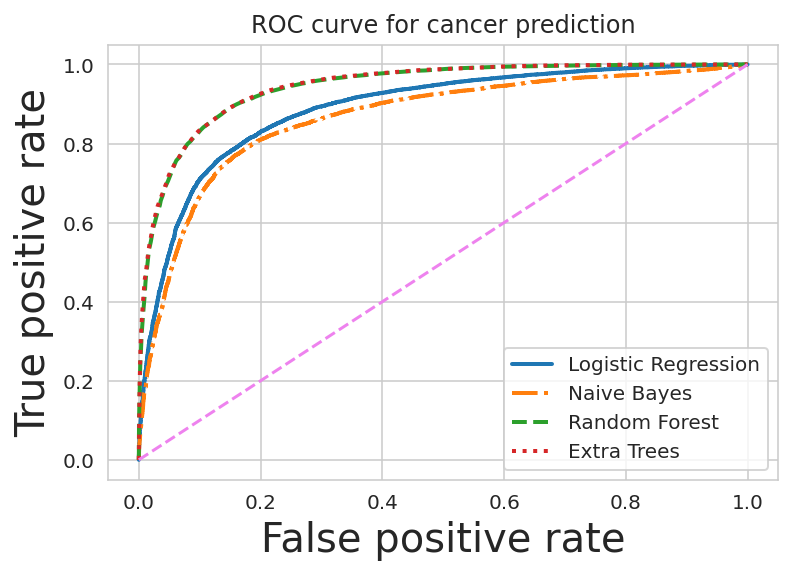

In [22]:
fpr1, tpr1, thresholds1 = roc_curve(y_val, lr_model.predict_proba(X_val)[:,1])
fpr2, tpr2, thresholds2 = roc_curve(y_val, nb_model.predict_proba(X_val)[:,1])
fpr3, tpr3, thresholds3 = roc_curve(y_val, rf_model.predict_proba(X_val)[:,1])
fpr4, tpr4, thresholds4 = roc_curve(y_val, et_model.predict_proba(X_val)[:,1])

plt.plot(fpr1, tpr1,lw=2,label='Logistic Regression')
plt.plot(fpr2, tpr2,lw=2, ls='-.',label='Naive Bayes')
plt.plot(fpr3, tpr3,lw=2, ls='--', label='Random Forest')
plt.plot(fpr4, tpr4,lw=2, ls=':', label='Extra Trees')

plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])

plt.xlabel('False positive rate', size=20)
plt.ylabel('True positive rate', size=20)
plt.title('ROC curve for cancer prediction')
plt.legend(loc='lower right')

print("ROC AUC score for LR model = ", roc_auc_score(y_val, lr_model.predict_proba(X_val)[:,1]))
print("ROC AUC score for NB model = ", roc_auc_score(y_val, nb_model.predict_proba(X_val)[:,1]))
print("ROC AUC score for RF model = ", roc_auc_score(y_val, rf_model.predict_proba(X_val)[:,1]))
print("ROC AUC score for ET model = ", roc_auc_score(y_val, et_model.predict_proba(X_val)[:,1]))
plt.savefig('/content/drive/My Drive/cancer/roc_model_comparison.svg')

In [25]:
et_model=ensemble.RandomForestClassifier(n_estimators=100)
scoring = ['accuracy', 'roc_auc', 'recall', 'precision']
scores=cross_validate(et_model, X_train, y_train, cv=10, scoring=scoring)
sorted(scores.keys())

['fit_time',
 'score_time',
 'test_accuracy',
 'test_precision',
 'test_recall',
 'test_roc_auc']

In [26]:
scores['test_accuracy']

array([0.86941001, 0.86901339, 0.86484879, 0.8699058 , 0.86871591,
       0.86840539, 0.87504958, 0.86652122, 0.87098374, 0.86255454])

In [27]:
scores['test_roc_auc']

array([0.94334223, 0.94380356, 0.93805423, 0.94373894, 0.93876521,
       0.94084875, 0.9451776 , 0.93917493, 0.94333015, 0.93780359])

In [28]:
scores['test_recall']

array([0.88337961, 0.87366125, 0.86555622, 0.87328971, 0.87586754,
       0.87385958, 0.87683459, 0.87286791, 0.87901626, 0.87306624])

In [29]:
scores['test_precision']

array([0.85934787, 0.86559245, 0.86435644, 0.8674414 , 0.86353861,
       0.86443006, 0.87371542, 0.86192714, 0.86511809, 0.85508936])

In [35]:
et_model.fit(X_train,y_train)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

ROC AUC score for LR model =  0.8897151805071508
ROC AUC score for NB model =  0.8703454921164622
ROC AUC score for RF model =  0.9419701176492971
ROC AUC score for ET model =  0.9443840277669316


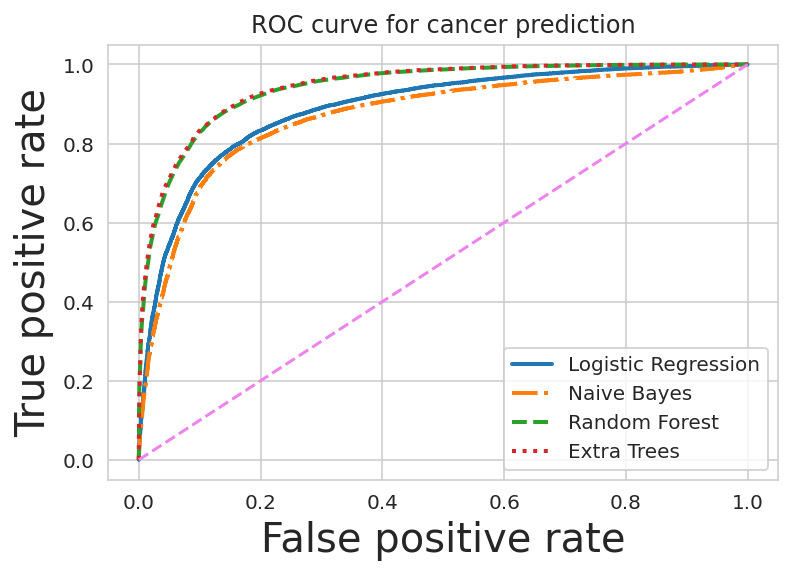

In [36]:
fpr1, tpr1, thresholds1 = roc_curve(y_test, lr_model.predict_proba(X_test)[:,1])
fpr2, tpr2, thresholds2 = roc_curve(y_test, nb_model.predict_proba(X_test)[:,1])
fpr3, tpr3, thresholds3 = roc_curve(y_test, rf_model.predict_proba(X_test)[:,1])
fpr4, tpr4, thresholds4 = roc_curve(y_test, et_model.predict_proba(X_test)[:,1])

plt.plot(fpr1, tpr1,lw=2,label='Logistic Regression')
plt.plot(fpr2, tpr2,lw=2, ls='-.',label='Naive Bayes')
plt.plot(fpr3, tpr3,lw=2, ls='--', label='Random Forest')
plt.plot(fpr4, tpr4,lw=2, ls=':', label='Extra Trees')

plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])

plt.xlabel('False positive rate', size=20)
plt.ylabel('True positive rate', size=20)
plt.title('ROC curve for cancer prediction')
plt.legend(loc='lower right')

print("ROC AUC score for LR model = ", roc_auc_score(y_test, lr_model.predict_proba(X_test)[:,1]))
print("ROC AUC score for NB model = ", roc_auc_score(y_test, nb_model.predict_proba(X_test)[:,1]))
print("ROC AUC score for RF model = ", roc_auc_score(y_test, rf_model.predict_proba(X_test)[:,1]))
print("ROC AUC score for ET model = ", roc_auc_score(y_test, et_model.predict_proba(X_test)[:,1]))
plt.savefig('/content/drive/My Drive/cancer/roc_model_comparison-test_set.svg')

In [0]:
def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=20):
    """Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap.
    
    Arguments
    ---------
    confusion_matrix: numpy.ndarray
        The numpy.ndarray object returned from a call to sklearn.metrics.confusion_matrix. 
        Similarly constructed ndarrays can also be used.
    class_names: list
        An ordered list of class names, in the order they index the given confusion matrix.
    figsize: tuple
        A 2-long tuple, the first value determining the horizontal size of the ouputted figure,
        the second determining the vertical size. Defaults to (10,7).
    fontsize: int
        Font size for axes labels. Defaults to 14.
        
    Returns
    -------
    matplotlib.figure.Figure
        The resulting confusion matrix figure
    """
    df_cm = pd.DataFrame(confusion_matrix, index=class_names, columns=class_names, )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d", cmap="RdPu", annot_kws={"fontsize":20})
      
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label', size=25)
    plt.xlabel('Predicted label', size=25)
    return fig

In [0]:
y_predict_et = et_model.predict(X_test)

In [60]:
accuracy_score(y_test, y_predict_et)

0.8711089957163256

In [49]:
recall_score(y_test, y_predict_et)

0.87751475534683

In [50]:
roc_auc_score(y_test, (et_model.predict_proba(X_test)[:,1]))

0.9443840277669316

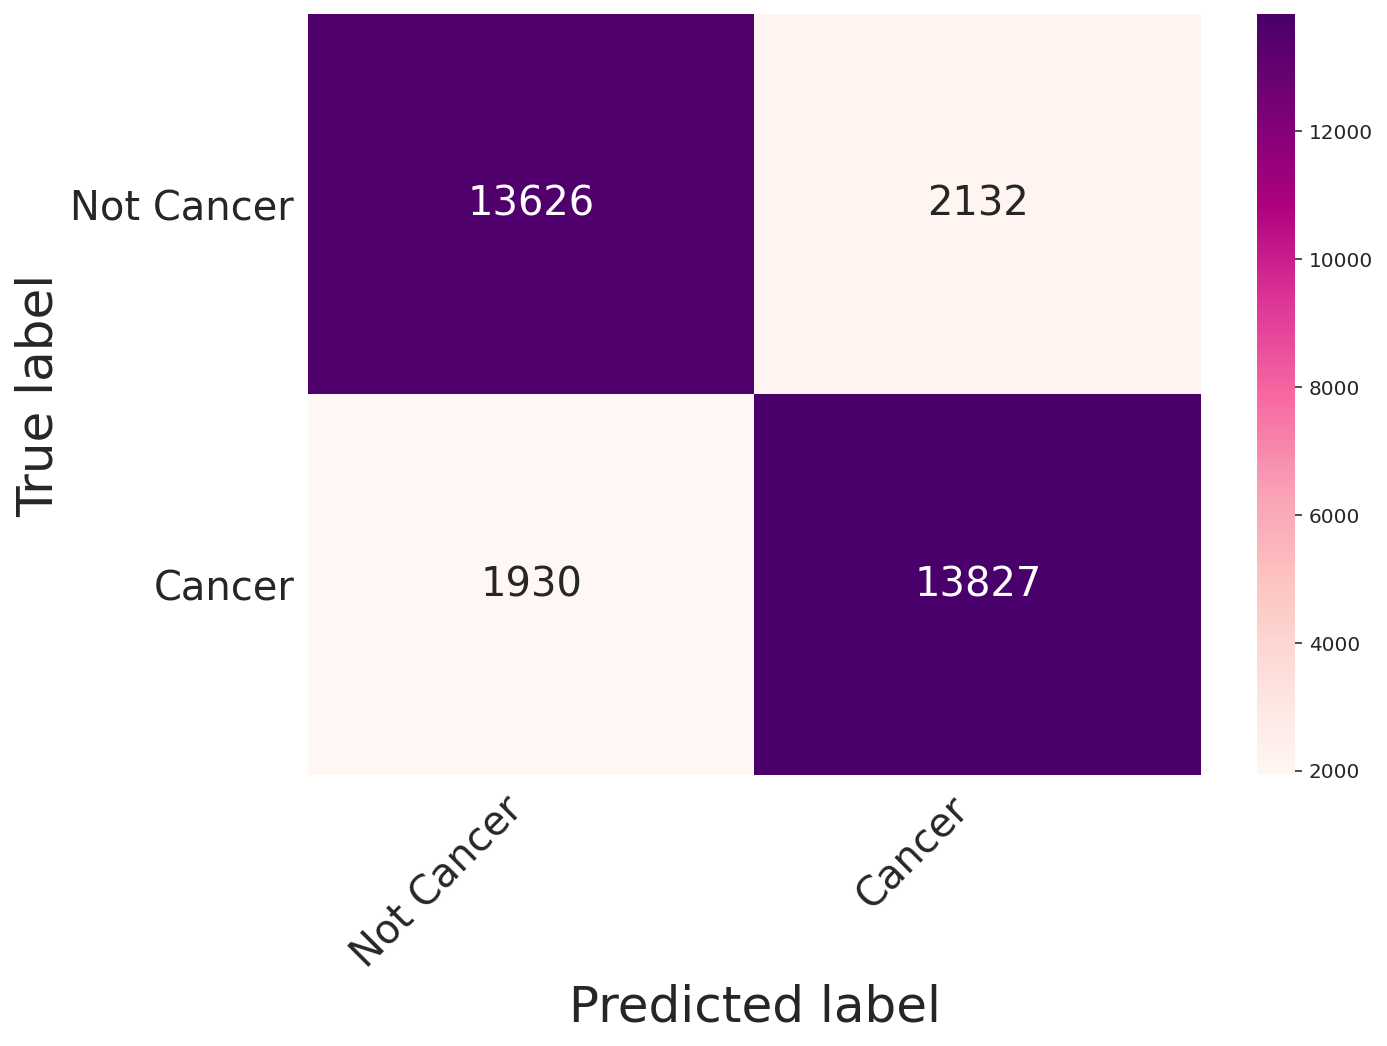

In [39]:
cm = print_confusion_matrix(confusion_matrix(y_test, y_predict_et), ['Not Cancer', 'Cancer'])
plt.savefig('/content/drive/My Drive/cancer/cm-et.svg')

Text(0.5, 1.0, 'Precision and Recall Curves')

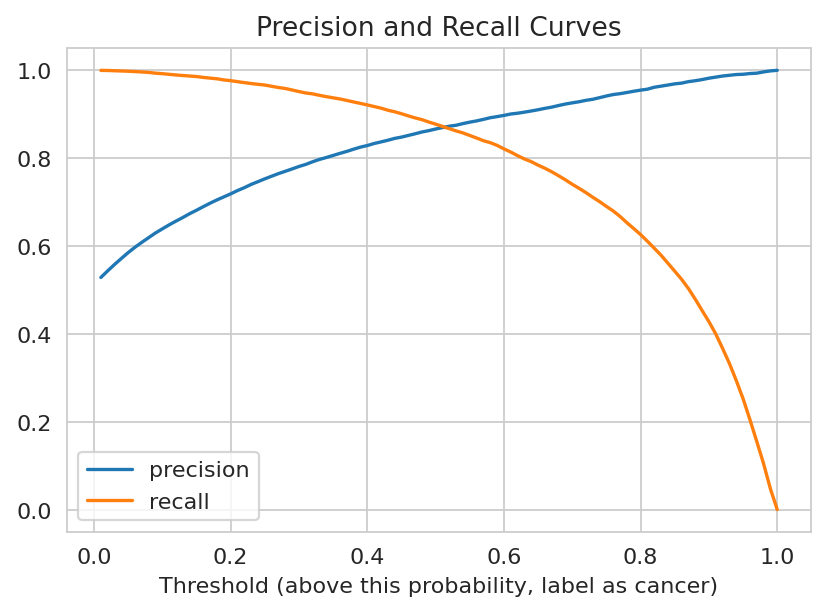

In [40]:
precision_curve, recall_curve, threshold_curve = precision_recall_curve(y_test, et_model.predict_proba(X_test)[:,1])

plt.figure(dpi=80)
plt.plot(threshold_curve, precision_curve[1:],label='precision')
plt.plot(threshold_curve, recall_curve[1:], label='recall')
plt.legend(loc='lower left')
plt.xlabel('Threshold (above this probability, label as cancer)')
plt.title('Precision and Recall Curves')

In [42]:
y_predict_et2 = (et_model.predict_proba(X_test)[:,1] > 0.2)
recall_score(y_test, y_predict_et2)

0.9764549089293647

In [43]:
roc_auc_score(y_test, (et_model.predict_proba(X_test)[:,1] > 0.2))

0.7972133663824383

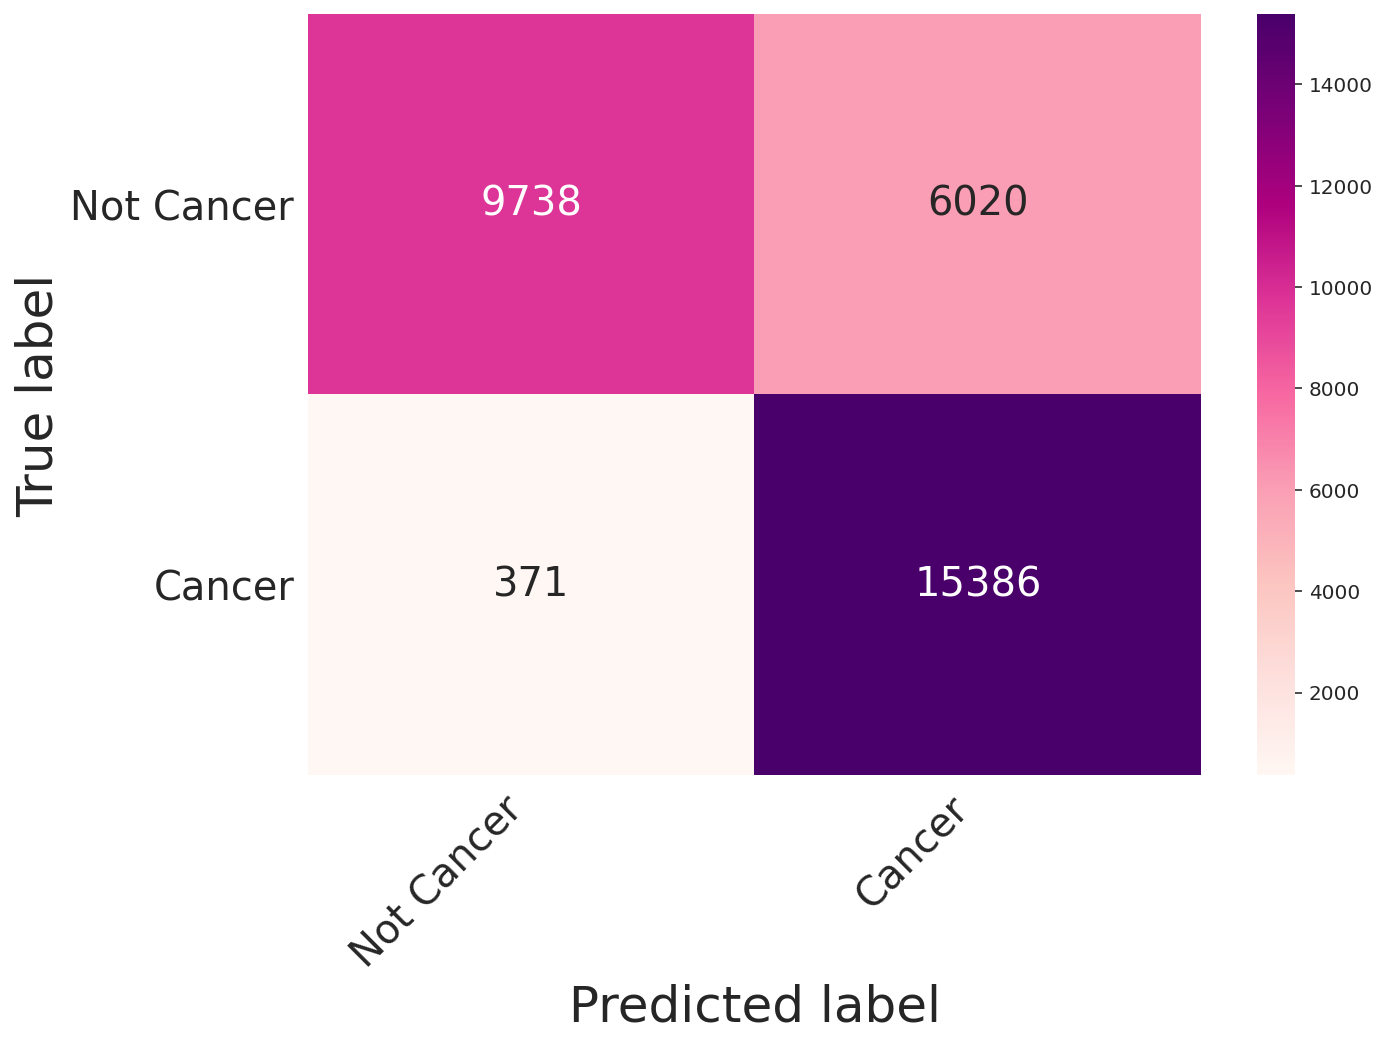

In [44]:
cm = print_confusion_matrix(confusion_matrix(y_test, y_predict_et2), ['Not Cancer', 'Cancer'])
plt.savefig('/content/drive/My Drive/cancer/cm-et_0.2.svg')

In [0]:
models1 = ["lr_model", "nb_model", "et_model"]

In [0]:
# Load pre-trained/tuned models

model_names1 = ["lr_model", "nb_model", "et_model"]

for model_name1 in model_names1:
    with open(f"/content/drive/My Drive/cancer/models/{model_name1}.pickle", "rb") as pfile:
        exec(f"{model_name1} = pickle.load(pfile)")

model_vars1 = [eval(n) for n in model_names1]
model_list1 = list(zip(model_names1, model_vars1))

In [54]:
voting_classifer = VotingClassifier(estimators=model_list1,
                                    voting='soft', #<-- sklearn calls this hard voting
                                    n_jobs=-1)
voting_classifer.fit(X_train, y_train)

VotingClassifier(estimators=[('lr_model',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('nb_model',
                              GaussianNB(priors=None, var_smoothing=1e-09)),
                             ('et_model',
                              Ext...
                                                   criterion='gini',
                 

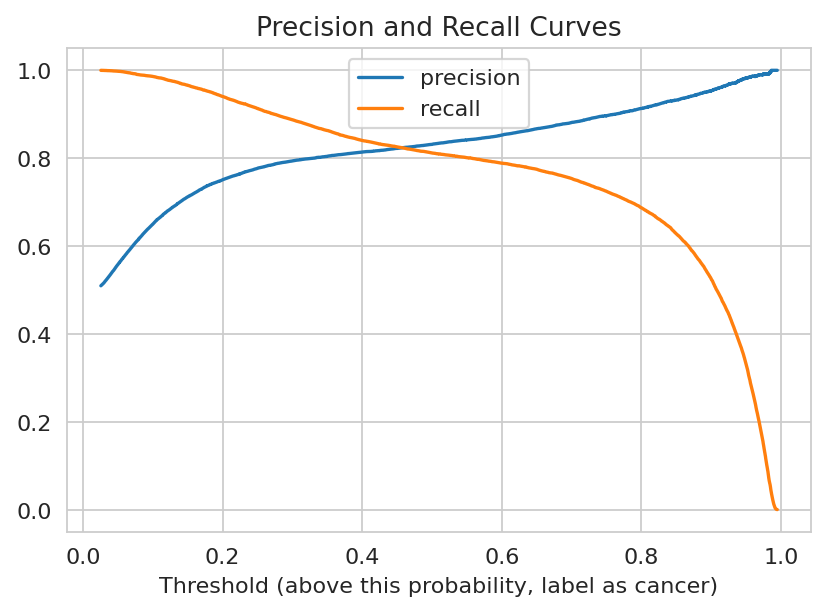

In [55]:
precision_curve, recall_curve, threshold_curve = precision_recall_curve(y_test, voting_classifer.predict_proba(X_test)[:,1])

plt.figure(dpi=80)
plt.plot(threshold_curve, precision_curve[1:],label='precision')
plt.plot(threshold_curve, recall_curve[1:], label='recall')
plt.legend(loc='upper center')
plt.xlabel('Threshold (above this probability, label as cancer)');
plt.title('Precision and Recall Curves');

In [57]:
y_pred1 = (voting_classifer.predict(X_test))
recall_score(y_test, y_pred1)

0.8118931268642509

In [58]:
roc_auc_score(y_test, y_pred1)

0.8235757041860282

In [59]:
accuracy_score(y_test, y_pred1)

0.8235760748849754

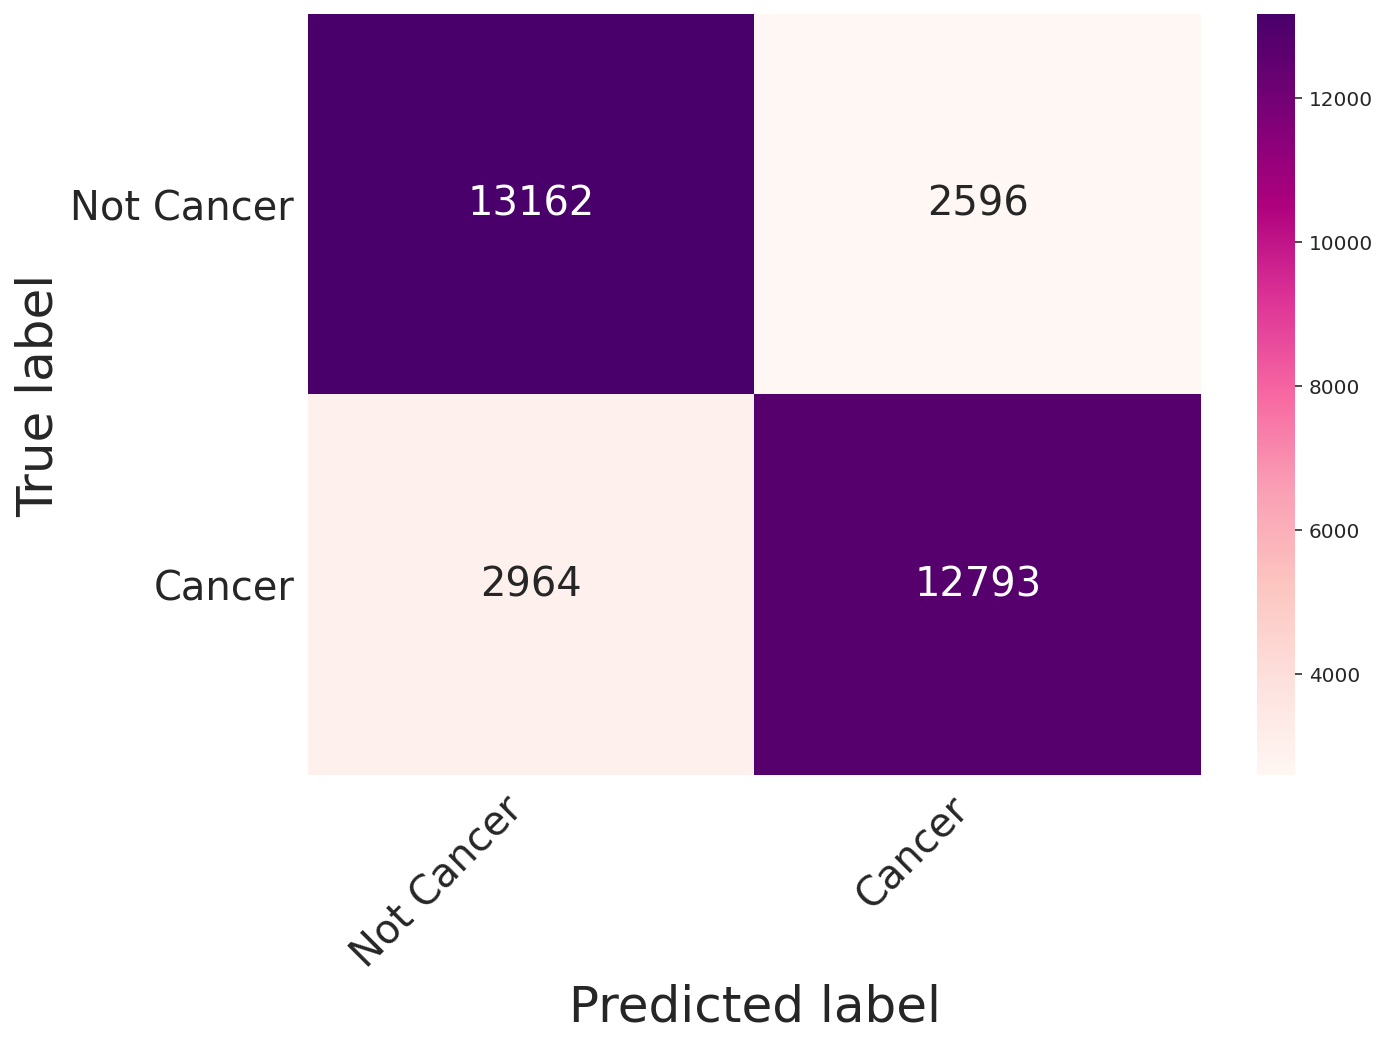

In [61]:
cm = print_confusion_matrix(confusion_matrix(y_test, y_pred1), ['Not Cancer', 'Cancer'])
plt.savefig('/content/drive/My Drive/cancer/cm-vc_1.svg')

In [0]:
models2 = ["lr_model", "rf_model", "et_model"]

In [0]:
# Load pre-trained/tuned models

model_names2 = ["lr_model", "rf_model", "et_model"]

for model_name2 in model_names2:
    with open(f"/content/drive/My Drive/cancer/models/{model_name2}.pickle", "rb") as pfile:
        exec(f"{model_name2} = pickle.load(pfile)")

model_vars2 = [eval(n) for n in model_names2]
model_list2 = list(zip(model_names2, model_vars2))

In [64]:
voting_classifer2 = VotingClassifier(estimators=model_list2,
                                    voting='soft', #<-- sklearn calls this hard voting
                                    n_jobs=-1)
voting_classifer2.fit(X_train, y_train)

VotingClassifier(estimators=[('lr_model',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('rf_model',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_we...
                                        

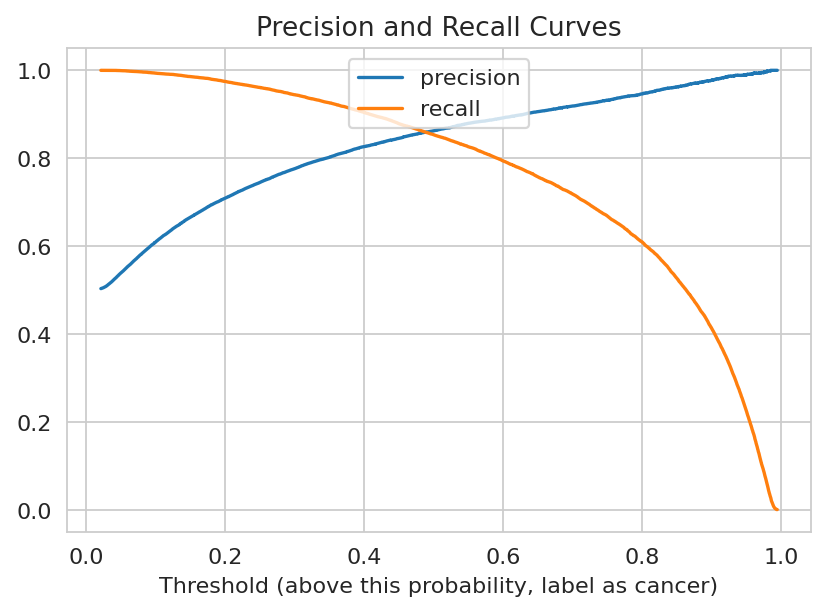

In [65]:
precision_curve, recall_curve, threshold_curve = precision_recall_curve(y_test, voting_classifer2.predict_proba(X_test)[:,1])

plt.figure(dpi=80)
plt.plot(threshold_curve, precision_curve[1:],label='precision')
plt.plot(threshold_curve, recall_curve[1:], label='recall')
plt.legend(loc='upper center')
plt.xlabel('Threshold (above this probability, label as cancer)');
plt.title('Precision and Recall Curves');

In [66]:
y_pred2 = voting_classifer2.predict(X_test)
recall_score(y_test, y_pred2)

0.8535888811321952

In [67]:
roc_auc_score(y_test, y_pred2)

0.8586068533088316

In [68]:
accuracy_score(y_test, y_pred2)

0.8586070125337141

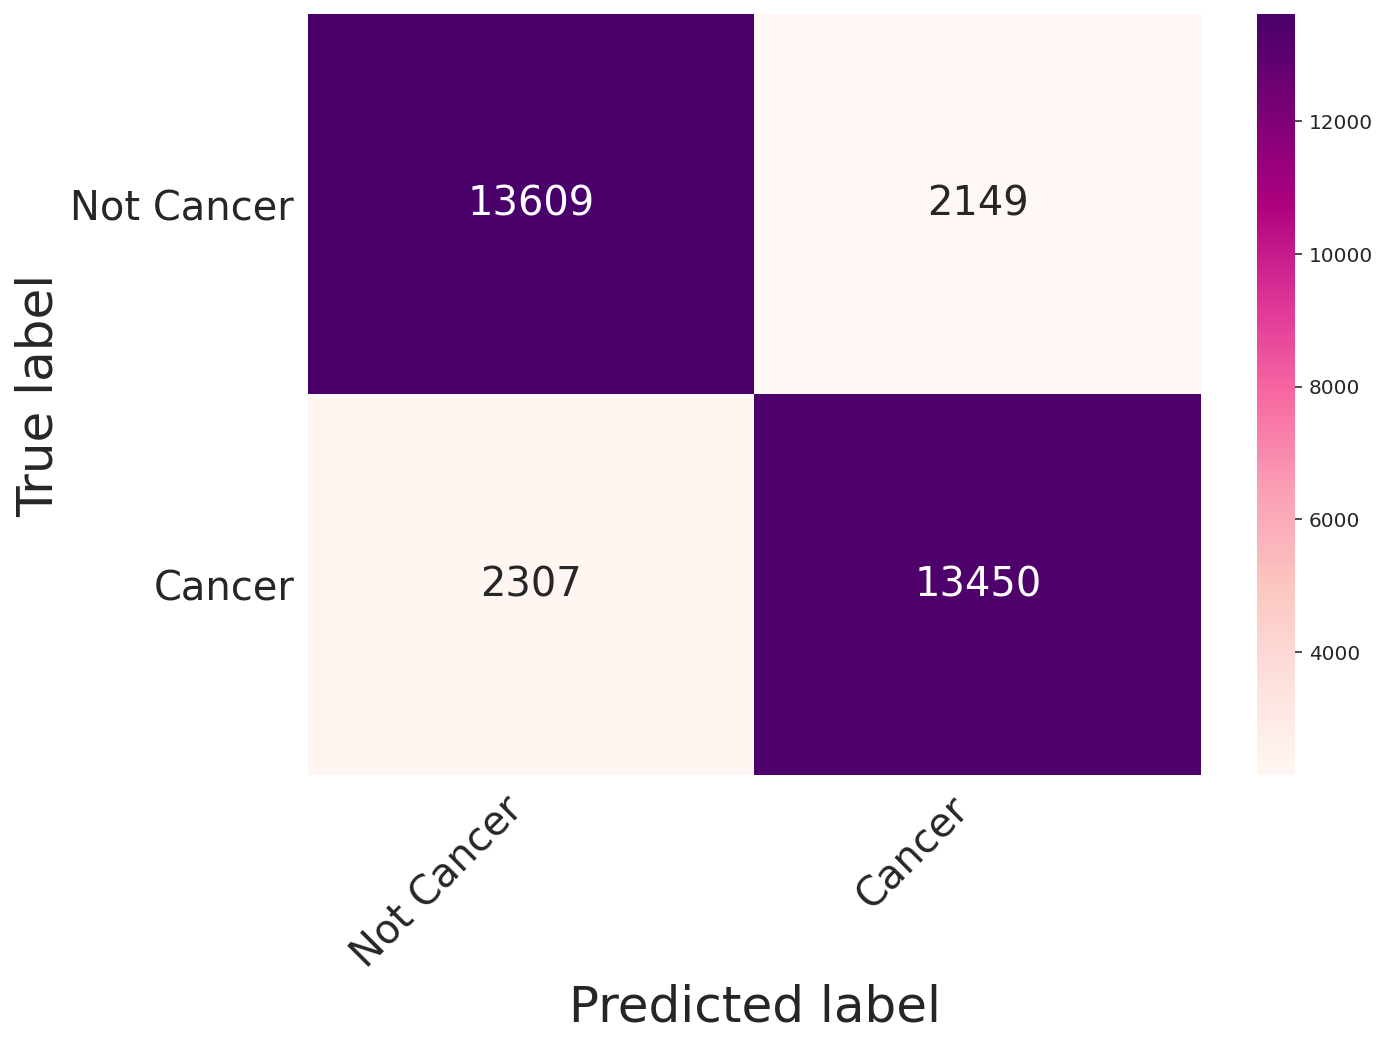

In [69]:
cm = print_confusion_matrix(confusion_matrix(y_test, y_pred2), ['Not Cancer', 'Cancer'])
plt.savefig('/content/drive/My Drive/cancer/cm-vc_2.svg')

In [0]:
models3 = ["nb_model", "rf_model", "et_model"]

In [0]:
# Load pre-trained/tuned models

model_names3 = ["nb_model", "rf_model", "et_model"]

for model_name3 in model_names3:
    with open(f"/content/drive/My Drive/cancer/models/{model_name3}.pickle", "rb") as pfile:
        exec(f"{model_name3} = pickle.load(pfile)")

model_vars3 = [eval(n) for n in model_names3]
model_list3 = list(zip(model_names3, model_vars3))

In [72]:
voting_classifer3 = VotingClassifier(estimators=model_list3,
                                    voting='soft', #<-- sklearn calls this hard voting
                                    n_jobs=-1)
voting_classifer3.fit(X_train, y_train)

VotingClassifier(estimators=[('nb_model',
                              GaussianNB(priors=None, var_smoothing=1e-09)),
                             ('rf_model',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=None,
                                                     max_features='auto',
                                                     max_leaf_nodes=None,
                                                     max_samples=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                        

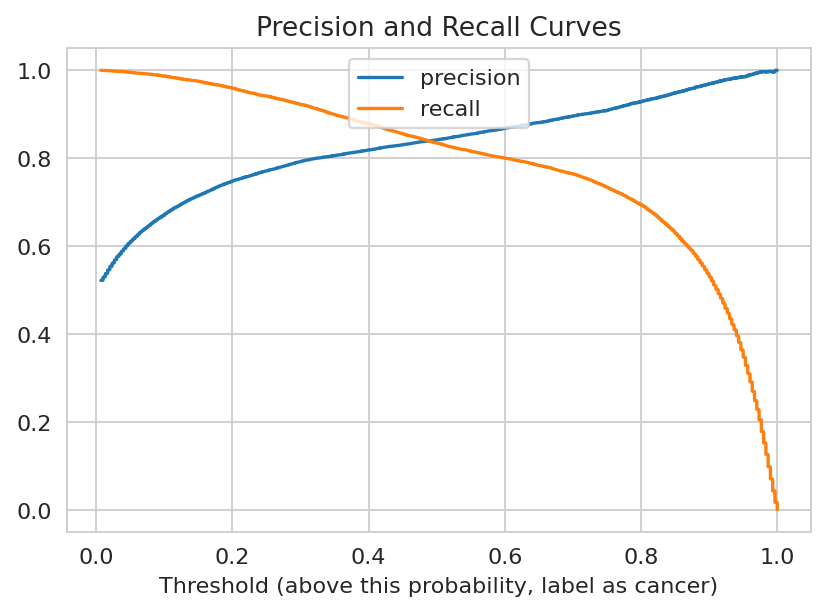

In [73]:
precision_curve, recall_curve, threshold_curve = precision_recall_curve(y_test, voting_classifer3.predict_proba(X_test)[:,1])

plt.figure(dpi=80)
plt.plot(threshold_curve, precision_curve[1:],label='precision')
plt.plot(threshold_curve, recall_curve[1:], label='recall')
plt.legend(loc='upper center')
plt.xlabel('Threshold (above this probability, label as cancer)');
plt.title('Precision and Recall Curves');

In [74]:
y_pred3 = voting_classifer3.predict(X_test)
recall_score(y_test, y_pred3)

0.8346131877895538

In [75]:
roc_auc_score(y_test,y_pred3)

0.8388067842742667

In [76]:
accuracy_score(y_test, y_pred3)

0.8388069173409488

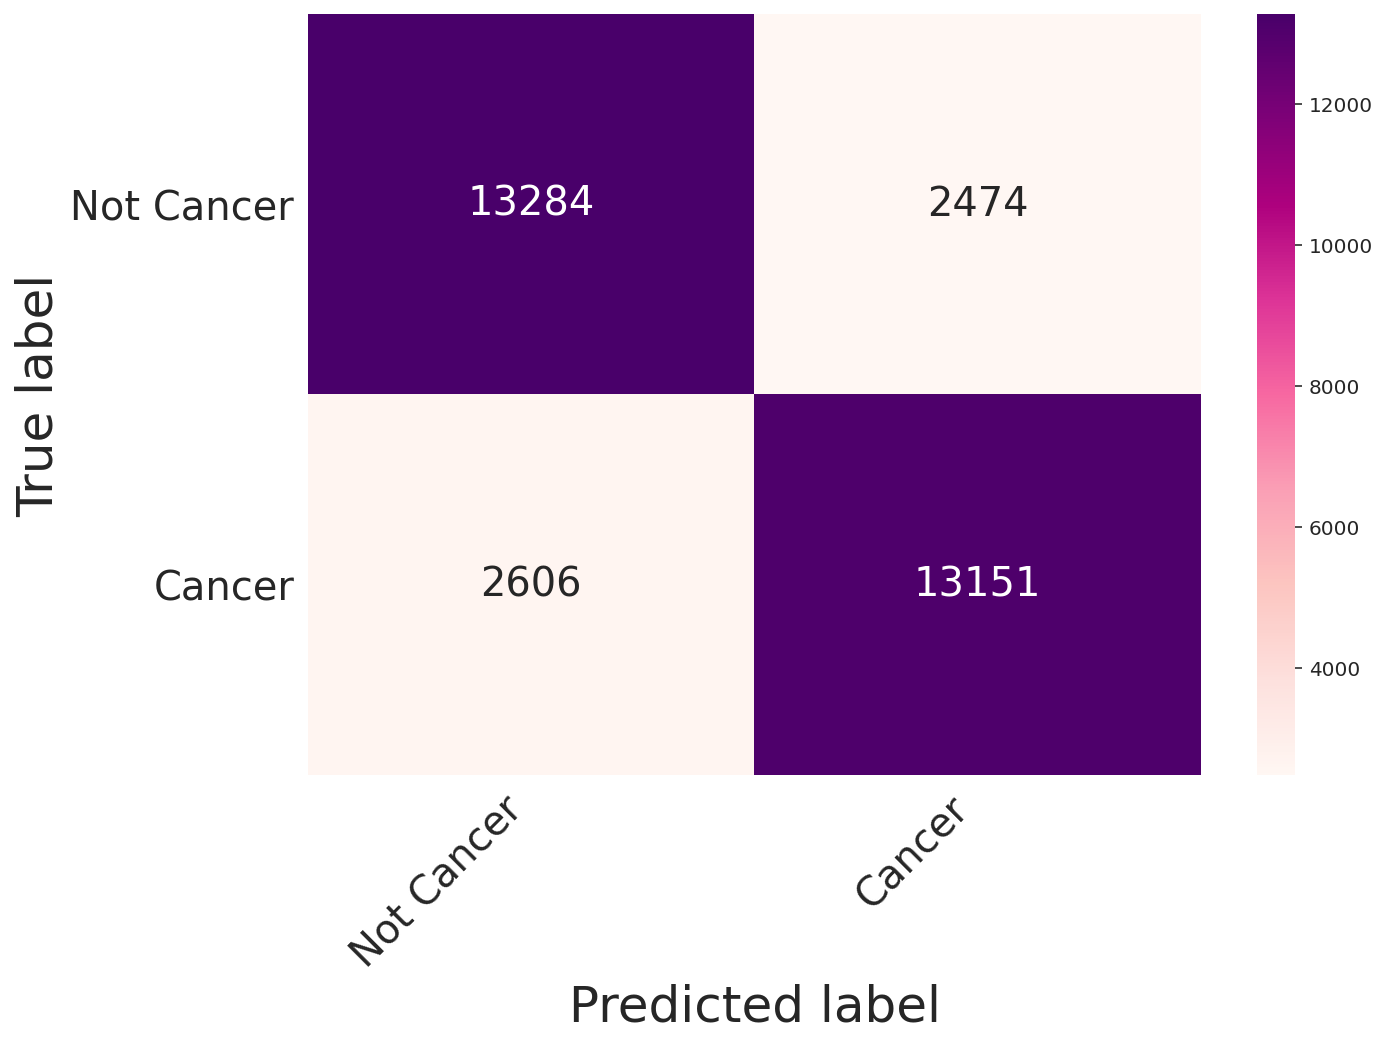

In [77]:
cm = print_confusion_matrix(confusion_matrix(y_test, y_pred3), ['Not Cancer', 'Cancer'])
plt.savefig('/content/drive/My Drive/cancer/cm-vc_3.svg')